**Cargar librerias necesarias**

In [62]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

**Cargar datos**

In [41]:
df = pd.read_csv('listings_limpio.csv')
df.head()

,id,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,Safe,Refrigerator,Smoke_alarm_home_safety,Essentials,Services,property_Entire_Place,property_Hotel_Room,property_Other,property_Private_Room,property_Shared_Room
0,30320,100,100,Sol,40.41476,-3.70418,2,1.0,1.0,2.0,...,0,0,0,0,0,True,False,False,False,False
1,40916,100,100,Universidad,40.42247,-3.70577,2,1.0,1.0,3.0,...,0,0,0,0,0,True,False,False,False,False
2,62423,100,99,Justicia,40.41884,-3.69655,4,1.5,1.0,2.0,...,0,1,1,1,0,False,False,False,True,False
3,70073,100,100,Universidad,40.42252,-3.70250,2,1.0,1.0,1.0,...,0,1,0,1,1,True,False,False,False,False
4,70310,100,100,Universidad,40.42252,-3.70250,2,1.0,1.0,2.0,...,0,1,0,1,1,True,False,False,False,False


Eliminar "neighbourhood_cleansed" ya que es redundante contar con esto al tener la longitu y latitud

In [42]:
df["neighbourhood_cleansed"]
df.drop(columns=["neighbourhood_cleansed"], inplace=True)

Codificar booleanas como 1 y 0 

In [43]:
bool_cols = df.select_dtypes(include="bool").columns
df[bool_cols] = df[bool_cols].astype(int)

df.head()

,id,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,...,Safe,Refrigerator,Smoke_alarm_home_safety,Essentials,Services,property_Entire_Place,property_Hotel_Room,property_Other,property_Private_Room,property_Shared_Room
0,30320,100,100,40.41476,-3.70418,2,1.0,1.0,2.0,157.0,...,0,0,0,0,0,1,0,0,0,0
1,40916,100,100,40.42247,-3.70577,2,1.0,1.0,3.0,143.0,...,0,0,0,0,0,1,0,0,0,0
2,62423,100,99,40.41884,-3.69655,4,1.5,1.0,2.0,65.0,...,0,1,1,1,0,0,0,0,1,0
3,70073,100,100,40.42252,-3.70250,2,1.0,1.0,1.0,116.0,...,0,1,0,1,1,1,0,0,0,0
4,70310,100,100,40.42252,-3.70250,2,1.0,1.0,2.0,79.0,...,0,1,0,1,1,1,0,0,0,0


**Separar en train y test**

In [44]:
train = df.sample(frac=0.8, random_state=100)
train.head()

,id,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,...,Safe,Refrigerator,Smoke_alarm_home_safety,Essentials,Services,property_Entire_Place,property_Hotel_Room,property_Other,property_Private_Room,property_Shared_Room
2415,32892473,100,92,40.406490,-3.745560,4,1.0,1.0,1.0,117.0,...,0,1,1,1,1,1,0,0,0,0
11422,1183135383050248925,50,40,40.421990,-3.702730,3,1.0,1.0,1.0,158.0,...,0,0,0,0,0,1,0,0,0,0
13907,1334659658421449266,33,17,40.473280,-3.704860,1,1.0,1.0,1.0,34.0,...,0,0,0,0,0,0,0,0,1,0
2120,29759801,100,100,40.333614,-3.702798,2,1.0,1.0,2.0,93.0,...,0,1,1,1,1,1,0,0,0,0
5370,664313376708004518,99,99,40.447750,-3.708190,4,1.0,1.0,2.0,118.0,...,0,1,0,1,1,1,0,0,0,0


In [45]:
test = df.drop(train.index)
test.head()

,id,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,...,Safe,Refrigerator,Smoke_alarm_home_safety,Essentials,Services,property_Entire_Place,property_Hotel_Room,property_Other,property_Private_Room,property_Shared_Room
26,339171,100,100,40.41285,-3.69553,4,1.0,1.0,2.0,157.0,...,0,1,1,1,1,1,0,0,0,0
27,342095,100,81,40.41015,-3.69797,2,1.0,1.0,2.0,95.0,...,0,1,1,1,1,1,0,0,0,0
40,469231,86,95,40.41941,-3.70823,2,1.0,1.0,1.0,139.0,...,0,1,0,1,1,1,0,0,0,0
45,502918,100,100,40.41155,-3.69492,1,1.0,2.0,1.0,50.0,...,0,1,1,1,1,0,0,0,1,0
48,510973,83,8,40.41412,-3.70057,1,2.0,1.0,3.0,101.0,...,0,1,0,1,0,0,0,0,1,0


In [46]:
print(train.shape)
print(test.shape)

(14131, 39)
(3533, 39)


**Separar X y Y**

In [47]:
y_train = train['price']
y_test = test['price']
x_train = train.drop(columns=['price'])
x_test = test.drop(columns=['price'])

**Construir el modelo usando tensorfloww**

capa de normalización

In [48]:
tf.keras.layers.Normalization

keras.src.layers.preprocessing.normalization.Normalization

In [49]:
norm = tf.keras.layers.Normalization()
norm.adapt(np.array(x_train))
norm.mean.numpy()
norm.variance.numpy()
np.sqrt(norm.variance.numpy())
norm(x_train).numpy()

array([[-1.5451945 ,  0.4210826 ,  0.23352788, ..., -0.05327937,
        -0.5463031 , -0.07870716],
       [ 0.63977593, -1.882206  , -1.7946874 , ..., -0.05327937,
        -0.5463031 , -0.07870716],
       [ 0.91960526, -2.6653242 , -2.6917827 , ..., -0.05327937,
         1.8304855 , -0.07870716],
       ...,
       [-0.4107798 ,  0.4210826 , -1.5216584 , ..., -0.05327937,
        -0.5463031 , -0.07870716],
       [ 1.127398  ,  0.4210826 ,  0.07751133, ..., -0.05327937,
         1.8304855 , -0.07870716],
       [ 0.16776411,  0.4210826 , -0.4295425 , ..., -0.05327937,
         1.8304855 , -0.07870716]], dtype=float32)

**Entrenar modelo multicapa**

In [56]:
dnn_model = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(x_train.shape[1],)),
      norm,
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [57]:
dnn_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))


In [58]:
dnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_5 (Normalization) │ (None, 38)             │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 990 (3.87 KB)

 Trainable params: 913 (3.57 KB)

 Non-trainable params: 77 (312.00 B)

In [60]:
%%time
history = dnn_model.fit(
  x_train,
  y_train,
  validation_split=0.2,
  epochs=100)

Epoch 1/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 122.3975 - val_loss: 85.7633
Epoch 2/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 56.8418 - val_loss: 63.3790
Epoch 3/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 49.5711 - val_loss: 59.9553
Epoch 4/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 46.9344 - val_loss: 57.3593
Epoch 5/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 44.9537 - val_loss: 55.3693
Epoch 6/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 43.2537 - val_loss: 53.6863
Epoch 7/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 41.7608 - val_loss: 52.3086
Epoch 8/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 40.5000 - val_loss: 50.9848
Epoch 9/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 39.5097 - val_loss: 50.0378
Epoch 10/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 38.7209 - val_loss: 49.1975
Epoch 11/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 38.0989 - val_loss: 48.6269
Epoch 12/100
354/3

In [71]:
print(history.history.keys())
print(len(history.history.get('loss', [])))
print(len(history.history.get('val_loss', [])))


dict_keys(['loss', 'val_loss'])
100
100


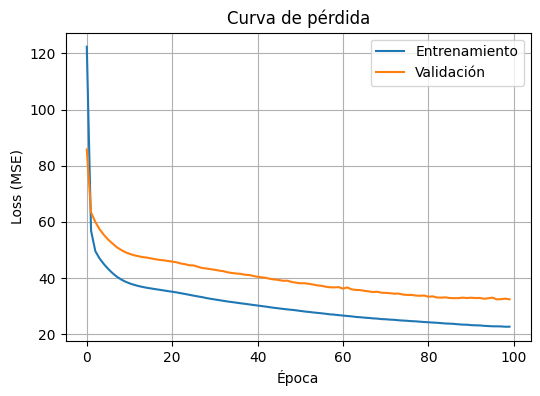

In [72]:
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Loss (MSE)')
plt.title('Curva de pérdida')
plt.legend()
plt.grid(True)
plt.show()

**Evaluar el modelo**

In [73]:
test_res = {}
test_res['dnn_model'] = dnn_model.evaluate(x_test, y_test, verbose=0)

In [74]:
test_res

{'dnn_model': 29.270692825317383}

111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


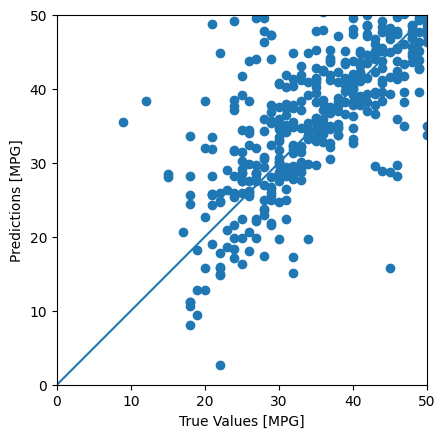

In [75]:
test_pred = dnn_model.predict(x_test).flatten()

plt.axes(aspect='equal')
plt.scatter(y_test, test_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_=plt.plot(lims, lims)